## Dragon Real Estate - Price Predictor

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv("data.csv")
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
housing.shape

(506, 14)

In [4]:
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
# housing.dropna(inplace=True)

In [6]:
housing["CHAS"].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


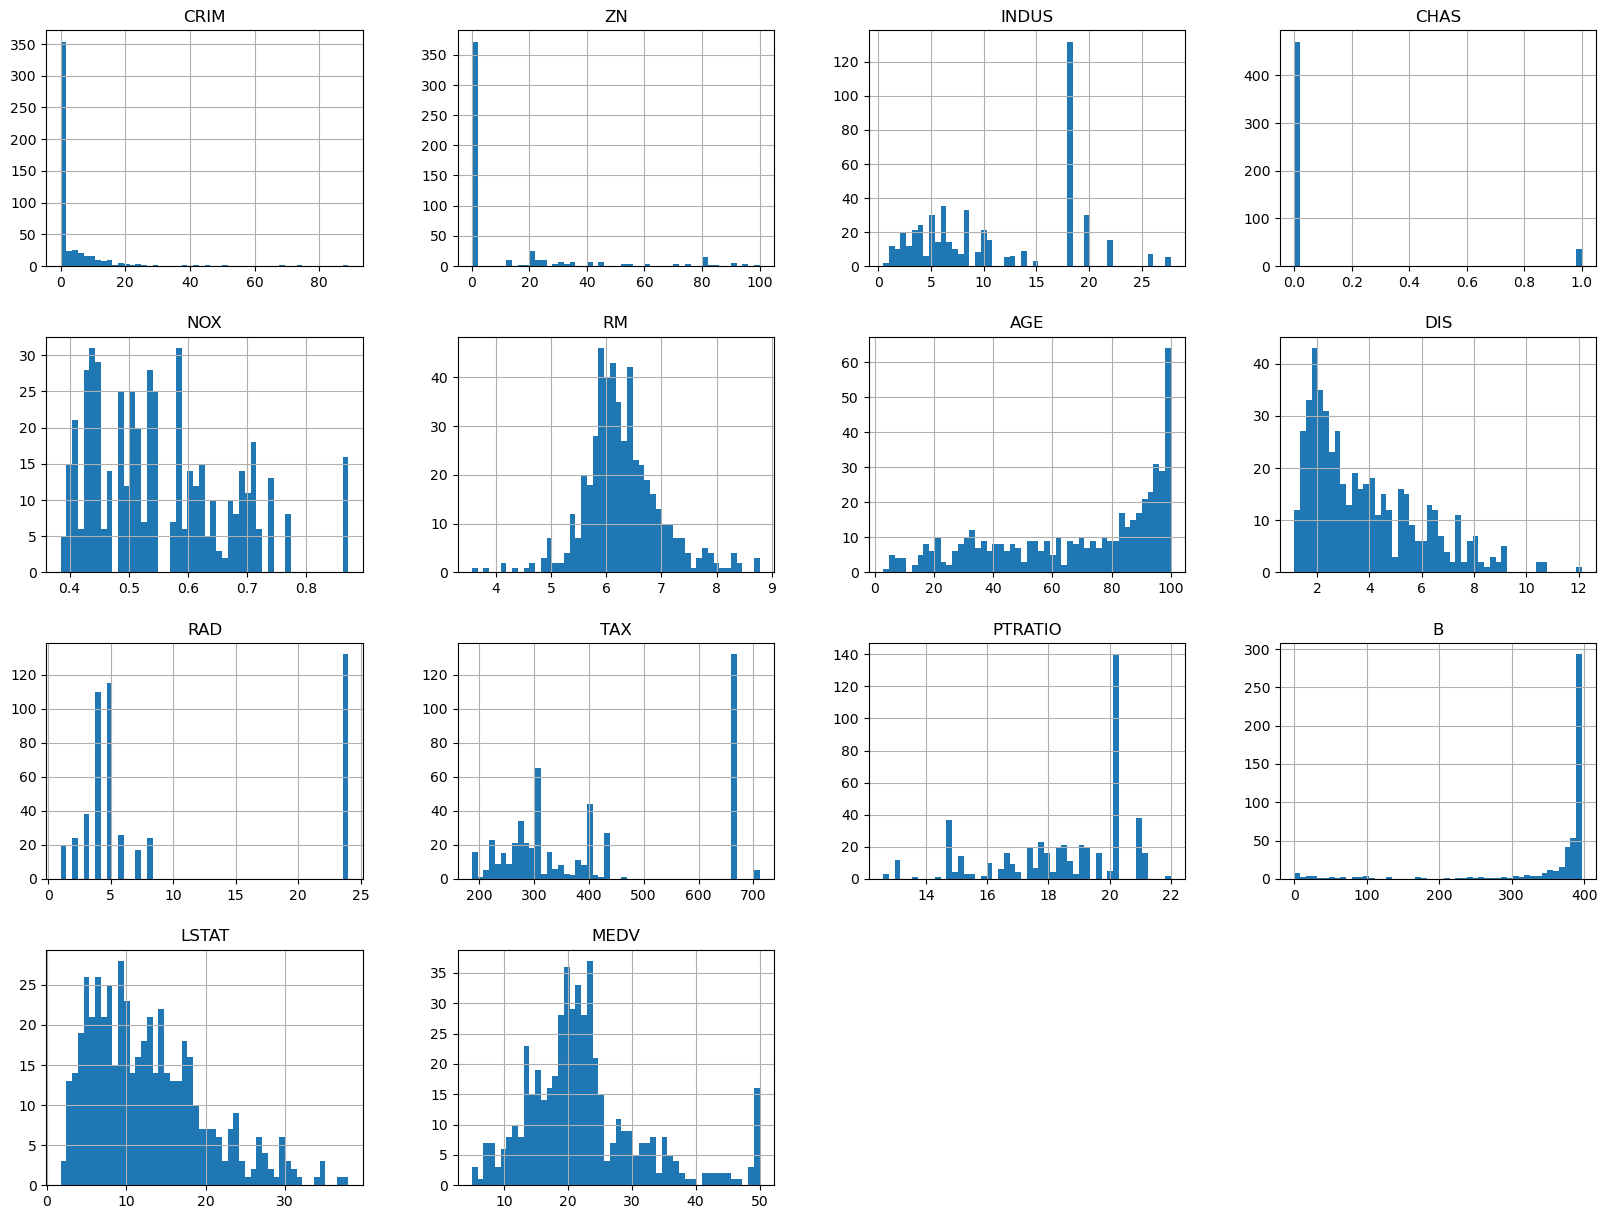

In [8]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

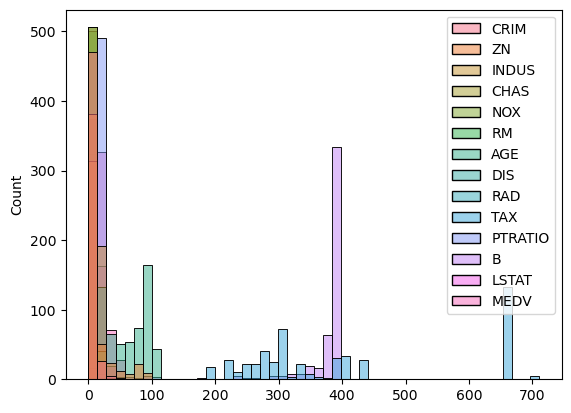

In [9]:
sns.histplot(data=housing, bins=50)
plt.show()

## Train Test Spliting

In [10]:
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[: test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train_set, test_set = split_train_test(housing, 0.2)

In [12]:
len(train_set)

405

In [13]:
len(test_set)

101

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

In [17]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.loc[test_index]

In [18]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [19]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [20]:
housing = strat_train_set.copy()

## Looking for Correlation

In [21]:
corr_matrix_test = housing.corr()

In [22]:
corr_matrix_test['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [23]:
from pandas.plotting import scatter_matrix

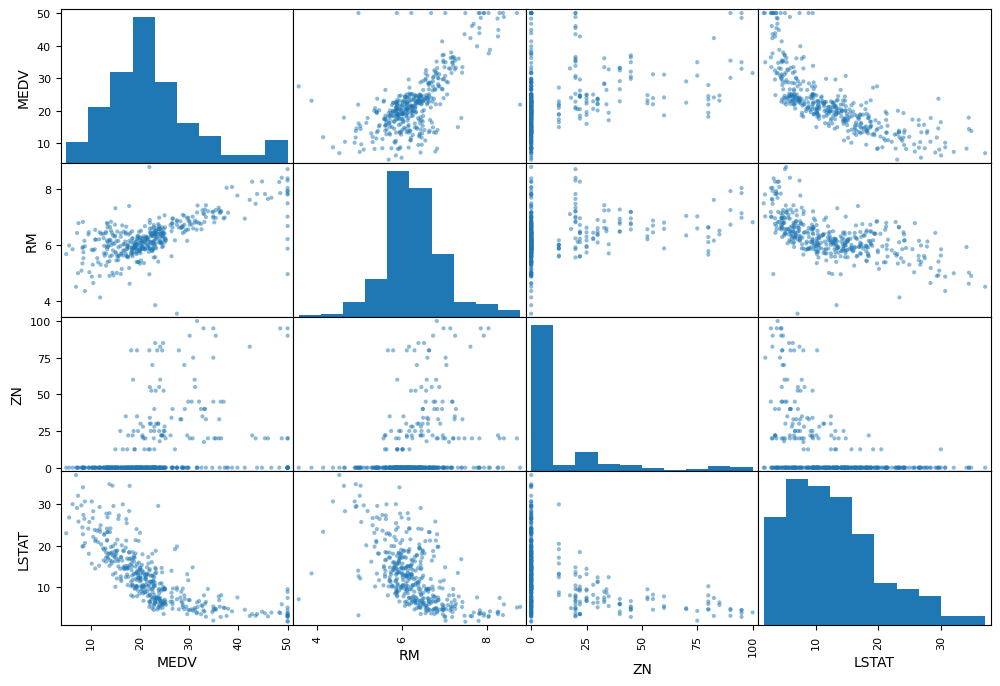

In [24]:
attributes = ['MEDV', 'RM', 'ZN', 'LSTAT']
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

<Figure size 1200x800 with 0 Axes>

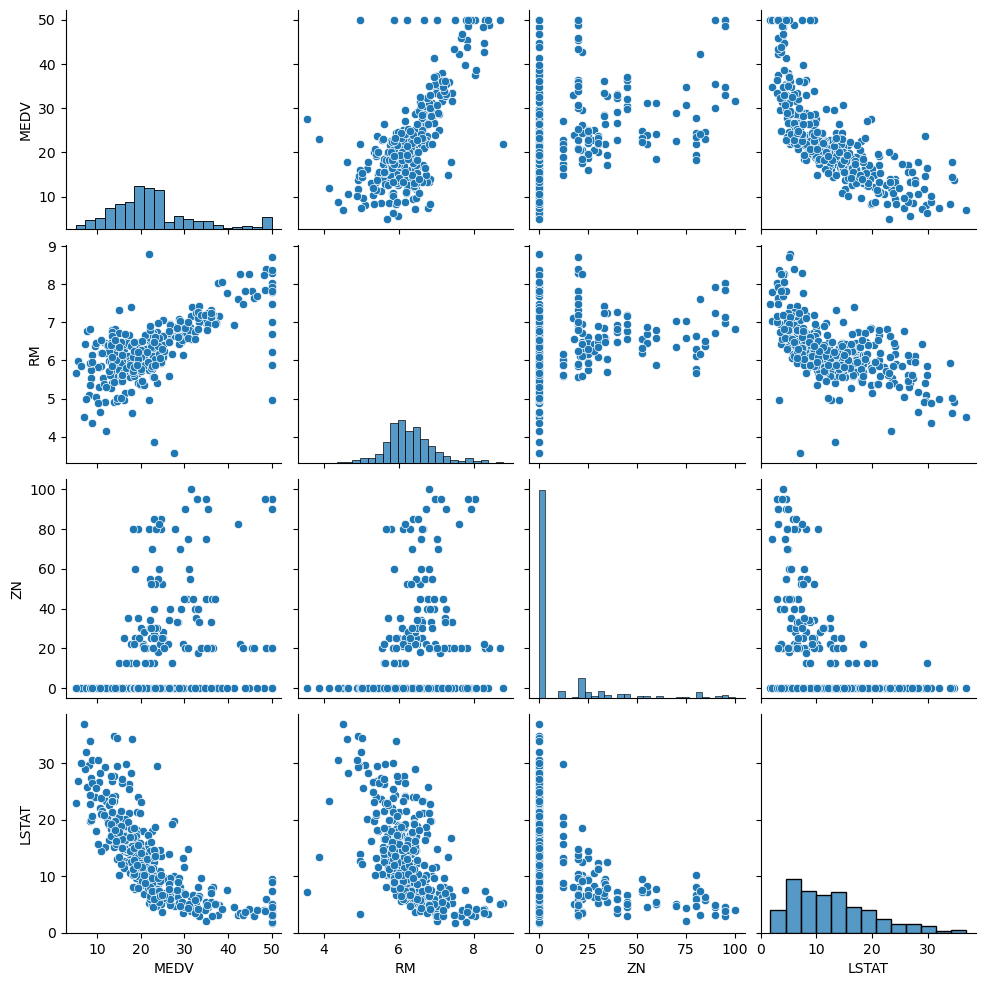

In [25]:
plt.figure(figsize=(12, 8))
attributes = ['MEDV', 'RM', 'ZN', 'LSTAT']
sns.pairplot(data=housing[attributes])
plt.show()

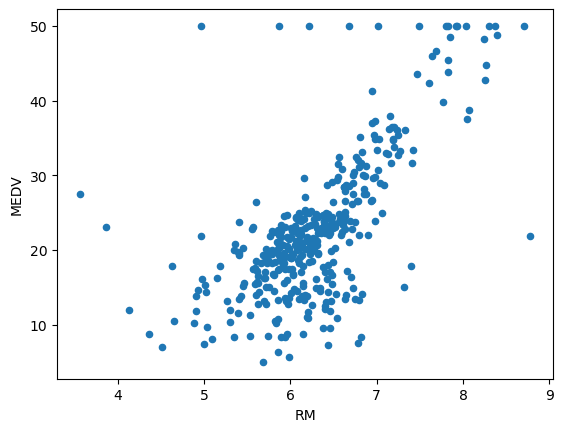

In [26]:
housing.plot(kind='scatter', x='RM', y="MEDV", alpha=1)
plt.show()

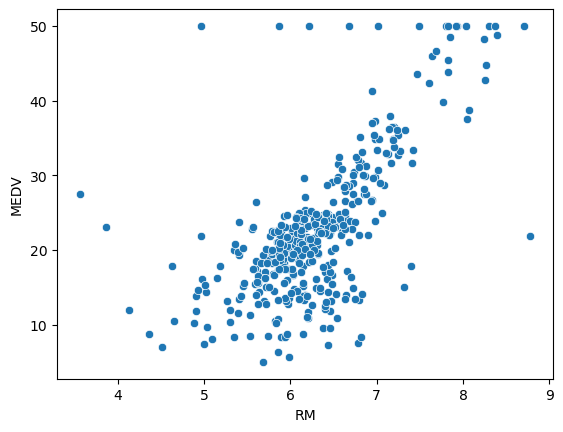

In [27]:
sns.scatterplot(data=housing, x='RM', y='MEDV')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_596\4294157559.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing)


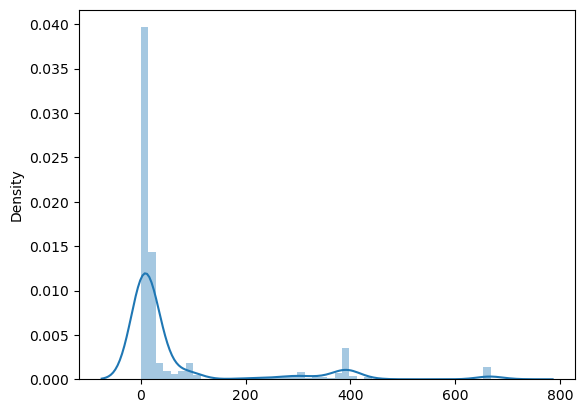

In [28]:
sns.distplot(housing)
plt.show()

## Trying out Attribute Combination

In [29]:
housing['TAXRM'] = housing['TAX']/housing['RM']
housing['TAXRM']

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [30]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [31]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.528626
LSTAT     -0.740494
Name: MEDV, dtype: float64

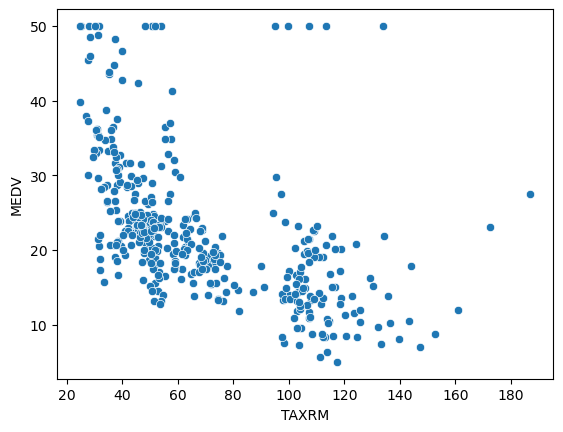

In [32]:
sns.scatterplot(data=housing, x='TAXRM', y='MEDV')
plt.show()

In [33]:
housing = strat_test_set.drop("MEDV", axis=1)
housing_labels = strat_test_set["MEDV"].copy()

## Missing Attribute

In [34]:
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [35]:
median = housing['RM'].median()

In [36]:
housing["RM"].fillna(median)

342    6.540
379    6.223
223    6.618
219    6.373
48     5.399
       ...  
88     7.007
466    5.952
52     6.511
121    6.004
218    5.951
Name: RM, Length: 102, dtype: float64

In [37]:
from sklearn.impute import SimpleImputer

In [38]:
imputer = SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [39]:
imputer.statistics_

array([1.76150e-01, 0.00000e+00, 7.76000e+00, 0.00000e+00, 5.15000e-01,
       6.17600e+00, 7.11000e+01, 3.42295e+00, 5.00000e+00, 3.07000e+02,
       1.91500e+01, 3.93740e+02, 1.05650e+01])

In [40]:
X = imputer.transform(housing)

In [41]:
X

array([[2.49800e-02, 0.00000e+00, 1.89000e+00, ..., 1.59000e+01,
        3.89960e+02, 8.65000e+00],
       [1.78667e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.93740e+02, 2.17800e+01],
       [6.14700e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.96900e+02, 7.60000e+00],
       ...,
       [5.36000e-02, 2.10000e+01, 5.64000e+00, ..., 1.68000e+01,
        3.96900e+02, 5.28000e+00],
       [7.16500e-02, 0.00000e+00, 2.56500e+01, ..., 1.91000e+01,
        3.77670e+02, 1.42700e+01],
       [1.10690e-01, 0.00000e+00, 1.38900e+01, ..., 1.64000e+01,
        3.96900e+02, 1.79200e+01]])

In [42]:
housing_tr = pd.DataFrame(X, columns=housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.303353,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.662996,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000
25%,0.057827,0.000000,4.950000,0.000000,0.448000,5.912750,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.176000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.539500,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000


In [43]:
housing_tr.shape

(102, 13)

## Scikit-learn Design

Primarily, Three types of objects
1. Estimators - It estimates some parameter based on a dataset. Eg. Imputer
                It has a fit method and transform method.
                Fit method - Fits the dataset and calculates internal parameters.

2. Transformers - Transform method taks input and return outputs based ont helearnings from fit().
                    It also has a convenience function aclled fit_transform() which fits and then transforms.

3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions.
                It also gives score function which will evaluate the predictions.

## Feature Scaling

Two types of Feature scaling methods.
1. Min-max scaling (Normalization)
    (value - min)/(max - min)
    Sklearn provides a class caleed MinMaxScaler for this.

2. Stardization
    (value - mean) / standard deviation(std)
    Sklearn provides a class called Standard Scaler for this.    


## Creating a Pipleline

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [45]:
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())

])

In [46]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [47]:
housing_num_tr

array([[-0.35082247, -0.49148409, -1.25183452, ..., -1.08091535,
         0.2995192 , -0.51357301],
       [ 1.37303938, -0.49148409,  1.15752471, ...,  0.78926008,
         0.35531976,  1.43854081],
       [-0.2938439 , -0.49148409, -0.61122142, ..., -0.42852857,
         0.40196786, -0.66968264],
       ...,
       [-0.34805722,  0.27583291, -0.69445654, ..., -0.68948328,
         0.40196786, -1.0146106 ],
       [-0.34631323, -0.49148409,  2.27971238, ...,  0.31084311,
         0.11809354,  0.32198523],
       [-0.3425412 , -0.49148409,  0.53177502, ..., -0.86345309,
         0.40196786,  0.86465206]])

In [48]:
type(housing_num_tr)

numpy.ndarray

## Selecting a desired model for Dragon Real Estates

In [49]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [50]:
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [51]:
some_data = housing.iloc[:5]

In [52]:
some_labels = housing_labels.iloc[:5]

In [53]:
prepared_data = my_pipeline.transform(some_data)

In [54]:
model.predict(prepared_data)

array([20.07 , 10.299, 28.123, 23.295, 15.526])

In [55]:
some_labels

342    16.5
379    10.2
223    30.1
219    23.0
48     14.4
Name: MEDV, dtype: float64

In [56]:
list[some_labels]

list[342    16.5
379    10.2
223    30.1
219    23.0
48     14.4
Name: MEDV, dtype: float64]

In [57]:
list(some_labels)

[16.5, 10.2, 30.1, 23.0, 14.4]

## Evaluating the model

In [58]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [59]:
mse

2.7768983725490215

In [60]:
rmse

1.666402824214188

## Using better evaluation technique - Cross Validation

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
scores =  cross_val_score(model, housing_num_tr, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)
rmse_scores = np.sqrt(-scores)

In [63]:
rmse_scores

array([4.27778606, 4.09121207, 5.05937453, 4.83280465, 2.74057149,
       5.3921112 , 5.26129414, 4.4221901 , 2.90650157, 4.08868473])

In [64]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

In [65]:
print_scores(rmse_scores)

Scores: [4.27778606 4.09121207 5.05937453 4.83280465 2.74057149 5.3921112
 5.26129414 4.4221901  2.90650157 4.08868473]
Mean: 4.307253053536105
Standard Deviation: 0.8633726458089648


Quiz: Convert this notebook into a python fie and run the pipeline using Visual Studio Code.

## Saving the model

In [68]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

## Testing the mmodel on test data

In [74]:
x_test = strat_test_set.drop("MEDV", axis=1)
y_test = strat_test_set["MEDV"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

# print(final_predictions, list(y_test))

[20.07  10.299 28.123 23.295 15.526 16.212 19.523 14.582 31.613 38.77
 21.481 11.649 23.797 23.269 19.763 11.431 31.716 14.198 23.616 19.789
 19.381 18.914 15.9   22.723 20.472 28.877 17.371 30.335  8.618 33.965
 20.872 21.181 23.429 12.089 23.344 15.377 40.609 24.115 22.625 42.164
 26.049 31.908 21.249 22.464 18.824 31.582 44.877 19.518 19.98  21.207
 20.974 14.073 20.106 16.661 26.039 32.495 46.86  28.13  19.101 20.023
 46.833  8.587 18.491 30.594 14.975 36.022 23.273 19.811 20.99  36.469
 25.877 22.211 23.501 21.514 34.228  9.612 18.892 20.856 20.504 21.264
 22.061 14.76  15.026 21.767 20.082 22.466 18.045 22.16  19.049 23.131
 19.463 27.867  7.035 24.608 20.201 26.574 22.001 26.923 18.253 25.55
 22.118 20.651] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 

In [71]:
final_rmse

1.666402824214188

In [72]:
final_mse

2.7768983725490215

In [75]:
prepared_data[0]

array([-0.35082247, -0.49148409, -1.25183452, -0.27144836, -0.21067276,
        0.35869844, -0.25450164,  1.07434355, -0.91150503,  0.17974455,
       -1.08091535,  0.2995192 , -0.51357301])